In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PHQ9 (923p)(8mr,8p)
The PHQ-9 is a valid measure of depression symptoms that are widely used for depression screening and treatment monitoring. Individuals report how often over the last 2 weeks they have experienced each of 9 core symptoms of major depression. This test was administered weekly from Week 0 to Week 4, then every two weeks until Week 12. It is a suitable tool for screening, diagnosing, and monitoring patients.

- Missing values (8 rows): Every **phq9_** column (NaN or 0.0) except **sum_phq9** and **phq9_1**

In [2]:
df_phq9 = pd.read_csv('data/phq9.csv')
df_phq9 = df_phq9.iloc[:, 3:]

# Location duration (315p)
- Missing values: Category: "none", "undefined category", "other"

In [3]:
df_location_duration = pd.read_csv('data/location_duration.csv')
df_location_duration = df_location_duration.iloc[:, 2:] # Remove the first 3 columns

print(df_location_duration['participant_id'].nunique(), "participants")
df_location_duration

315 participants


,participant_id,date,category,duration
0,EN00033,2016-08-13,home,5699.0
1,EN00033,2016-08-13,none,23460.0
2,EN00033,2016-08-14,home,63239.0
3,EN00033,2016-08-14,none,0.0
4,EN00033,2016-08-15,home,44220.0
...,...,...,...,...
32027,ES05073,2017-03-20,home,360.0
32028,ES05073,2017-03-20,none,2220.0
32029,ES05073,2017-03-21,none,0.0
32030,ES05073,2017-03-22,home,26160.0


## Cleaning
- Remove rows of participants whose PHQ9 is not available
- Remove rows with undefined category
- Remove rows with duration == 0.0

Resulting size:
- 32'032 rows -> 12'077 rows (62% loss)
- 315 participants -> 240 participants (24% loss)

### Remove the participants whose PHQ9 is not available (64)
- 32'032 rows -> 29'435 rows (8% loss)
- 315 participants -> 251 participants (20% loss)

In [4]:
# Participants that are in df_location_duration and df_phq9
intersection = set(df_location_duration['participant_id']) & set(df_phq9['participant_id'])
df_location_duration = df_location_duration[df_location_duration['participant_id'].isin(intersection)]

print(df_location_duration['participant_id'].nunique(), "participants")
df_location_duration

251 participants


,participant_id,date,category,duration
56,EN00035,2016-09-13,none,55979.0
57,EN00035,2016-09-14,none,56280.0
58,EN00039,2016-09-15,home,13620.0
59,EN00039,2016-09-15,none,9180.0
60,EN00039,2016-09-17,education,960.0
...,...,...,...,...
32027,ES05073,2017-03-20,home,360.0
32028,ES05073,2017-03-20,none,2220.0
32029,ES05073,2017-03-21,none,0.0
32030,ES05073,2017-03-22,home,26160.0


### Remove rows with category "none", "undefined category" or "other"
- 29'435 rows -> 16'083 rows (45% loss)
- 251 participants -> 240 participants (11 participants have only been detected in "other" category) (4% loss)
- 22 categories -> 19 categories

In [5]:
# Count the unique categories
print(df_location_duration['category'].nunique(), "categories")
print(df_location_duration['category'].unique())

22 categories
['none' 'home' 'education' 'other' 'home_store' 'dining_out' 'park'
 'health' 'place_of_worship' 'personal_services' 'consumer_goods'
 'supermarket' 'finance' 'repair' 'lodging' 'entertainment' 'transit'
 'work' 'government_offices' 'automotive' 'place_of_mourning'
 'undefined category']


In [6]:
# Remove all rows with category "none", "other", "undefined category"
df_location_duration_no_none = df_location_duration[
    (df_location_duration['category'] != 'none') &
    (df_location_duration['category'] != 'other') &
    (df_location_duration['category'] != 'undefined category')
]

print(df_location_duration_no_none['participant_id'].nunique(), "participants")
print(df_location_duration_no_none['category'].nunique(), "categories")
print(df_location_duration_no_none['category'].unique())
df_location_duration_no_none

240 participants
19 categories
['home' 'education' 'home_store' 'dining_out' 'park' 'health'
 'place_of_worship' 'personal_services' 'consumer_goods' 'supermarket'
 'finance' 'repair' 'lodging' 'entertainment' 'transit' 'work'
 'government_offices' 'automotive' 'place_of_mourning']


,participant_id,date,category,duration
58,EN00039,2016-09-15,home,13620.0
60,EN00039,2016-09-17,education,960.0
61,EN00039,2016-09-17,home,0.0
63,EN00039,2016-11-11,home,15120.0
64,EN00039,2016-11-13,home,30659.0
...,...,...,...,...
32021,ES05073,2017-03-16,home,31260.0
32023,ES05073,2017-03-17,home,20579.0
32025,ES05073,2017-03-18,home,58920.0
32027,ES05073,2017-03-20,home,360.0


The ratios are computed only on measures not belonging to these categories

=> The remaining ratio is considered implicitly as the ratio of an undefined category

### Remove rows with duration == 0.0
- 16'083 rows -> 12'077 rows (25% loss)
- same # participants
- same # categories

In [7]:
# Remove the rows with duration 0
df_location_duration_no_none = df_location_duration_no_none[df_location_duration_no_none['duration'] != 0]

print(df_location_duration_no_none['participant_id'].nunique(), "participants")
print(df_location_duration_no_none['category'].nunique(), "categories")
print(df_location_duration_no_none['category'].unique())
df_location_duration_no_none

240 participants
19 categories
['home' 'education' 'home_store' 'dining_out' 'park' 'health'
 'place_of_worship' 'personal_services' 'consumer_goods' 'supermarket'
 'finance' 'repair' 'lodging' 'entertainment' 'transit' 'work'
 'government_offices' 'automotive' 'place_of_mourning']


,participant_id,date,category,duration
58,EN00039,2016-09-15,home,13620.0
60,EN00039,2016-09-17,education,960.0
63,EN00039,2016-11-11,home,15120.0
64,EN00039,2016-11-13,home,30659.0
66,EN00039,2016-11-14,home,86399.0
...,...,...,...,...
32021,ES05073,2017-03-16,home,31260.0
32023,ES05073,2017-03-17,home,20579.0
32025,ES05073,2017-03-18,home,58920.0
32027,ES05073,2017-03-20,home,360.0


## Stats

### Date counts per participant

Number of dates per participant:
   - Min: 1
   - Max: 186
   - Mean: 43.44583333333333
   - Median: 38.0
participant_id
EN00039    48
EN00041    32
EN00046    49
EN00047    10
EN00052     3
           ..
ES05054    52
ES05059    22
ES05060    71
ES05062    64
ES05073    53
Name: date, Length: 240, dtype: int64


<AxesSubplot:xlabel='date'>

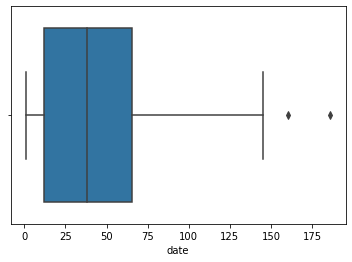

In [8]:
# Count the number of different dates at which each participant was studied
date_counts = df_location_duration_no_none.groupby('participant_id')['date'].nunique()

print("Number of dates per participant:")
print("   - Min:", date_counts.min())
print("   - Max:", date_counts.max())
print("   - Mean:", date_counts.mean())
print("   - Median:", date_counts.median())
print(date_counts)
sns.boxplot(x=date_counts)

### (Defined) Category counts per participant per day

Number of categories per participant per day:
  - min: 1
  - max: 4
  - mean: 1.1582430229212621
  - median: 1.0
1    8927
2    1359
3     132
4       9
Name: count, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Count'>

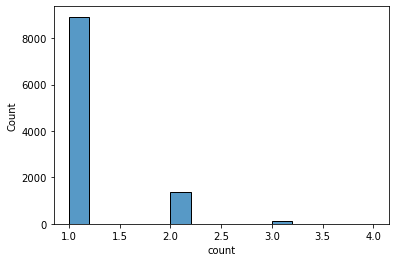

In [9]:
# Count the categories visited by each participant each day  
category_counts = df_location_duration_no_none.groupby(['participant_id', 'date']).size().reset_index().rename(columns={0:'count'}).sort_values('participant_id', ascending=True)

print("Number of categories per participant per day:")
print("  - min:", category_counts['count'].min())
print("  - max:", category_counts['count'].max())
print("  - mean:", category_counts['count'].mean())
print("  - median:", category_counts['count'].median())
print(category_counts['count'].value_counts())

sns.histplot(category_counts['count'])


<AxesSubplot:xlabel='count'>

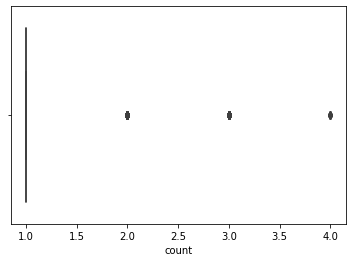

In [10]:
sns.boxplot(x=category_counts['count'])

Most of the time, only one DEFINED category per day

## Transformation: Ratio of the categories visited by each participant each day

- 12'077 rows -> 10'427 rows
- (240 participants -> 240 participants)

In [11]:
# Create a column for each category and put the duration (in seconds) spent in each category/column for each (participant, day) pair
df_location_ratio = df_location_duration_no_none.pivot_table(index=['participant_id', 'date'], columns='category', values='duration', aggfunc=np.sum)
# Replace NaN with 0
df_location_ratio = df_location_ratio.fillna(0)
df_location_ratio

# Check all rows contain at least one non-zero value
assert len(df_location_ratio[df_location_ratio.sum(axis=1) == 0]) == 0

In [12]:
# Number of seconds in a day (86400)
seconds_in_day = 24*60*60

# Divide each category column by the number of seconds in a day
df_location_ratio = df_location_ratio.div(seconds_in_day)
df_location_ratio

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-09-15         0.0             0.0         0.0   0.000000   
               2016-09-17         0.0             0.0         0.0   0.011111   
               2016-11-11         0.0             0.0         0.0   0.000000   
               2016-11-13         0.0             0.0         0.0   0.000000   
               2016-11-14         0.0             0.0         0.0   0.000000   
...                               ...             ...         ...        ...   
ES05073        2017-03-16         0.0             0.0         0.0   0.000000   
               2017-03-17         0.0             0.0         0.0   0.000000   
               2017-03-18         0.0             0.0         0.0   0.000000   
               2017-03-20         0.0             0.0         0.0   0.000000   
               2017-03-22         0.0             0.0         0.0   0.000000   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00039        2016-09-15            0.0      0.0                 0.0     0.0   
               2016-09-17            0.0      0.0                 0.0     0.0   
               2016-11-11            0.0      0.0                 0.0     0.0   
               2016-11-13            0.0      0.0                 0.0     0.0   
               2016-11-14            0.0      0.0                 0.0     0.0   
...                                  ...      ...                 ...     ...   
ES05073        2017-03-16            0.0      0.0                 0.0     0.0   
               2017-03-17            0.0      0.0                 0.0     0.0   
               2017-03-18            0.0      0.0                 0.0     0.0   
               2017-03-20            0.0      0.0                 0.0     0.0   
               2017-03-22            0.0      0.0                 0.0     0.0   

category                       home  home_store  lodging  park  \
participant_id date                                              
EN00039        2016-09-15  0.157639         0.0      0.0   0.0   
               2016-09-17  0.000000         0.0      0.0   0.0   
               2016-11-11  0.175000         0.0      0.0   0.0   
               2016-11-13  0.354850         0.0      0.0   0.0   
               2016-11-14  0.999988         0.0      0.0   0.0   
...                             ...         ...      ...   ...   
ES05073        2017-03-16  0.361806         0.0      0.0   0.0   
               2017-03-17  0.238183         0.0      0.0   0.0   
               2017-03-18  0.681944         0.0      0.0   0.0   
               2017-03-20  0.004167         0.0      0.0   0.0   
               2017-03-22  0.302778         0.0      0.0   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-09-15                0.0                0.0   
               2016-09-17                0.0                0.0   
               2016-11-11                0.0                0.0   
               2016-11-13                0.0                0.0   
               2016-11-14                0.0                0.0   
...                                      ...                ...   
ES05073        2017-03-16                0.0                0.0   
               2017-03-17                0.0                0.0   
               2017-03-18                0.0                0.0   
               2017-03-20                0.0                0.0   
               2017-03-22                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                                                         
EN00039        2016-

## Stats

### Most visited categories

<AxesSubplot:ylabel='Count'>

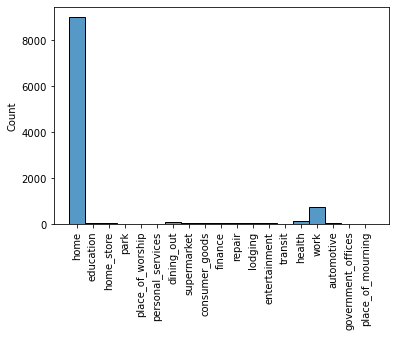

In [13]:
# For each (participant, day) pair, print the category with the highest ratio
df_location_ratio_max = df_location_ratio.idxmax(axis=1)
plt.xticks(rotation=90)
sns.histplot(df_location_ratio_max)


In [14]:
pd.concat([df_location_ratio_max.value_counts(),
                df_location_ratio_max.value_counts(normalize=True)],
                axis=1,
                keys=('count', 'freq'))

,count,freq
home,9008,0.863911
work,760,0.072888
health,138,0.013235
dining_out,73,0.007001
lodging,61,0.005850
entertainment,47,0.004508
consumer_goods,46,0.004412
finance,44,0.004220
repair,39,0.003740
supermarket,37,0.003548


The most visited category is "home" for 86.3% of the participants

### Days where participant visited more than one defined location (2, 3 or 4)

In [15]:
df_many_locations = df_location_ratio.loc[(df_location_ratio.iloc[:, 2:] > 0).sum(axis=1) > 1]
df_many_locations

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-11-28         0.0             0.0    0.000000        0.0   
               2016-12-17         0.0             0.0    0.011806        0.0   
EN00046        2016-09-28         0.0             0.0    0.000000        0.0   
               2016-10-04         0.0             0.0    0.006944        0.0   
               2016-10-25         0.0             0.0    0.000000        0.0   
...                               ...             ...         ...        ...   
ES05060        2017-03-10         0.0             0.0    0.000000        0.0   
               2017-03-23         0.0             0.0    0.000000        0.0   
ES05062        2017-01-16         0.0             0.0    0.000000        0.0   
               2017-03-05         0.0             0.0    0.009722        0.0   
               2017-03-31         0.0             0.0    0.017361        0.0   

category                   entertainment   finance  government_offices  \
participant_id date                                                      
EN00039        2016-11-28            0.0  0.000000                 0.0   
               2016-12-17            0.0  0.000000                 0.0   
EN00046        2016-09-28            0.0  0.000000                 0.0   
               2016-10-04            0.0  0.000000                 0.0   
               2016-10-25            0.0  0.000000                 0.0   
...                                  ...       ...                 ...   
ES05060        2017-03-10            0.0  0.000000                 0.0   
               2017-03-23            0.0  0.000000                 0.0   
ES05062        2017-01-16            0.0  0.041667                 0.0   
               2017-03-05            0.0  0.000000                 0.0   
               2017-03-31            0.0  0.000000                 0.0   

category                     health      home  home_store   lodging  park  \
participant_id date                                                         
EN00039        2016-11-28  0.000000  0.077083      0.1125  0.000000   0.0   
               2016-12-17  0.000000  0.071516      0.0000  0.000000   0.0   
EN00046        2016-09-28  0.010417  0.085405      0.0000  0.000000   0.0   
               2016-10-04  0.000000  0.124988      0.0000  0.000000   0.0   
               2016-10-25  0.020139  0.156238      0.0000  0.000000   0.0   
...                             ...       ...         ...       ...   ...   
ES05060        2017-03-10  0.000000  0.386100      0.0000  0.073611   0.0   
               2017-03-23  0.016667  0.900683      0.0000  0.000000   0.0   
ES05062        2017-01-16  0.000000  0.468056      0.0000  0.000000   0.0   
               2017-03-05  0.000000  0.226377      0.0000  0.000000   0.0   
               2017-03-31  0.000000  0.031933      0.0000  0.000000   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-11-28                0.0                0.0   
               2016-12-17                0.0                0.0   
EN00046        2016-09-28                0.0                0.0   
               2016-10-04                0.0                0.0   
               2016-10-25                0.0                0.0   
...                                      ...                ...   
ES05060        2017-03-10                0.0                0.0   
               2017-03-23                0.0                0.0   
ES05062        2017-01-16                0.0                0.0   
               2017-03-05                0.0                0.0   
               2017-03-31                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                          

Observation: 86.4% of the measurements (9012 / 10427) have been done in only one (defined) location

participant_id  date      
EN00039         2016-09-15    0.157639
                2016-09-17    0.011111
                2016-11-11    0.175000
                2016-11-13    0.354850
                2016-11-14    0.999988
                                ...   
ES05073         2017-03-16    0.361806
                2017-03-17    0.238183
                2017-03-18    0.681944
                2017-03-20    0.004167
                2017-03-22    0.302778
Length: 10427, dtype: float64


<AxesSubplot:ylabel='Count'>

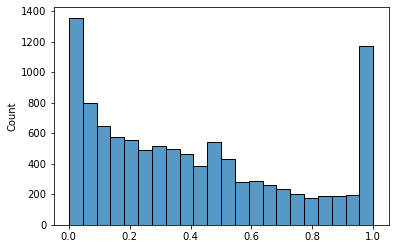

In [16]:
df_location_ratio_sum = df_location_ratio.sum(axis=1)
print(df_location_ratio_sum)

# Distribution of the sums
sns.histplot(df_location_ratio_sum)


Location ratio sum per participant per day:
  - min: 0.0006828703703703705
  - max: 0.999988425925926
  - mean: 0.40867399983660646
  - median: 0.34166666666666673


<AxesSubplot:>

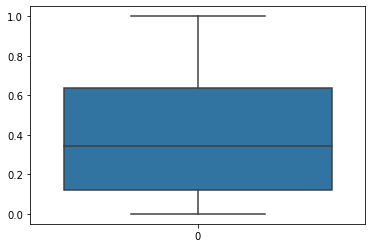

In [17]:
print("Location ratio sum per participant per day:")
print("  - min:", df_location_ratio_sum.min())
print("  - max:", df_location_ratio_sum.max())
print("  - mean:", df_location_ratio_sum.mean())
print("  - median:", df_location_ratio_sum.median())
sns.boxplot(df_location_ratio_sum)

Observation: All participants have missing location duration info, most of them between 40 and 60%

#### Days with lot of location ratio info (almost 100%)

In [18]:
df_lot_info = df_location_ratio[df_location_ratio_sum == df_location_ratio_sum.max()]
df_lot_info

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-11-14         0.0             0.0         0.0        0.0   
               2016-12-09         0.0             0.0         0.0        0.0   
               2016-12-10         0.0             0.0         0.0        0.0   
               2016-12-15         0.0             0.0         0.0        0.0   
               2016-12-18         0.0             0.0         0.0        0.0   
...                               ...             ...         ...        ...   
ES05060        2017-02-24         0.0             0.0         0.0        0.0   
               2017-03-17         0.0             0.0         0.0        0.0   
ES05062        2017-01-23         0.0             0.0         0.0        0.0   
               2017-03-06         0.0             0.0         0.0        0.0   
ES05073        2017-03-12         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00039        2016-11-14            0.0      0.0                 0.0     0.0   
               2016-12-09            0.0      0.0                 0.0     0.0   
               2016-12-10            0.0      0.0                 0.0     0.0   
               2016-12-15            0.0      0.0                 0.0     0.0   
               2016-12-18            0.0      0.0                 0.0     0.0   
...                                  ...      ...                 ...     ...   
ES05060        2017-02-24            0.0      0.0                 0.0     0.0   
               2017-03-17            0.0      0.0                 0.0     0.0   
ES05062        2017-01-23            0.0      0.0                 0.0     0.0   
               2017-03-06            0.0      0.0                 0.0     0.0   
ES05073        2017-03-12            0.0      0.0                 0.0     0.0   

category                       home  home_store  lodging  park  \
participant_id date                                              
EN00039        2016-11-14  0.999988         0.0      0.0   0.0   
               2016-12-09  0.999988         0.0      0.0   0.0   
               2016-12-10  0.999988         0.0      0.0   0.0   
               2016-12-15  0.999988         0.0      0.0   0.0   
               2016-12-18  0.999988         0.0      0.0   0.0   
...                             ...         ...      ...   ...   
ES05060        2017-02-24  0.999988         0.0      0.0   0.0   
               2017-03-17  0.999988         0.0      0.0   0.0   
ES05062        2017-01-23  0.999988         0.0      0.0   0.0   
               2017-03-06  0.999988         0.0      0.0   0.0   
ES05073        2017-03-12  0.999988         0.0      0.0   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-11-14                0.0                0.0   
               2016-12-09                0.0                0.0   
               2016-12-10                0.0                0.0   
               2016-12-15                0.0                0.0   
               2016-12-18                0.0                0.0   
...                                      ...                ...   
ES05060        2017-02-24                0.0                0.0   
               2017-03-17                0.0                0.0   
ES05062        2017-01-23                0.0                0.0   
               2017-03-06                0.0                0.0   
ES05073        2017-03-12                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                                                         
EN00039        2016-

In [19]:
# For each (participant_id, date) pair of df_lot_info, get the name of the category with the highest ratio
df_lot_info_max = df_location_ratio_max.loc[df_lot_info.index]
df_lot_info_max.value_counts()

home           1042
work              3
supermarket       1
dtype: int64

Almost all the spent whole the day at home

In [20]:
df_lot_info[df_lot_info['work'] > 0]

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00073        2016-11-02         0.0             0.0         0.0        0.0   
               2016-11-03         0.0             0.0         0.0        0.0   
EN00136        2016-09-24         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00073        2016-11-02            0.0      0.0                 0.0     0.0   
               2016-11-03            0.0      0.0                 0.0     0.0   
EN00136        2016-09-24            0.0      0.0                 0.0     0.0   

category                   home  home_store  lodging  park  personal_services  \
participant_id date                                                             
EN00073        2016-11-02   0.0         0.0      0.0   0.0                0.0   
               2016-11-03   0.0         0.0      0.0   0.0                0.0   
EN00136        2016-09-24   0.0         0.0      0.0   0.0                0.0   

category                   place_of_mourning  place_of_worship  repair  \
participant_id date                                                      
EN00073        2016-11-02                0.0               0.0     0.0   
               2016-11-03                0.0               0.0     0.0   
EN00136        2016-09-24                0.0               0.0     0.0   

category                   supermarket  transit      work  
participant_id date                                        
EN00073        2016-11-02          0.0      0.0  0.999988  
               2016-11-03          0.0      0.0  0.999988  
EN00136        2016-09-24          0.0      0.0  0.999988

spent the whole day at work

In [21]:
# Rows where 'supermarket' not zero
df_lot_info[df_lot_info['supermarket'] > 0]

,category,automotive,consumer_goods,dining_out,education,entertainment,finance,government_offices,health,home,home_store,lodging,park,personal_services,place_of_mourning,place_of_worship,repair,supermarket,transit,work
participant_id,date,,,,,,,,,,,,,,,,,,,
EN00416,2017-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999988,0.0,0.0


spent the whole day in a supermarket

#### Days with few location ratio info (almost 0%)

In [22]:
df_few_info = df_location_ratio[df_location_ratio_sum == df_location_ratio_sum.min()]
df_few_info

,category,automotive,consumer_goods,dining_out,education,entertainment,finance,government_offices,health,home,home_store,lodging,park,personal_services,place_of_mourning,place_of_worship,repair,supermarket,transit,work
participant_id,date,,,,,,,,,,,,,,,,,,,
EN00147,2016-09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00295,2016-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00554,2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00588,2016-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# For each (participant_id, date) pair of df_few_info, get the name of the category with the highest ratio
df_few_info_max = df_location_ratio_max.loc[df_few_info.index]
df_few_info_max.value_counts()

home    4
dtype: int64

## Write to csv

In [24]:
df_location_ratio.to_csv('df_location_ratio.csv')

# Passive mobility features (319p)

- Missing values:
    - **location_variance** (NaN: "(nothing)")

In [25]:
df_passive_mobility_features = pd.read_csv('data/passive_mobility_features_brighten_v2.csv')
df_passive_mobility_features = df_passive_mobility_features.iloc[:, 3:]

print(df_passive_mobility_features['participant_id'].nunique(), "participants")
df_passive_mobility_features

319 participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,9.733,0.000,11.750,6.833,1.517,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,0.133,0.000,20.133,3.833,2.117,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,0.167,0.183,11.767,4.817,0.917,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,0.200,0.050,25.883,17.900,2.467,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,0.167,0.550,16.467,3.967,1.467,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,5.567,0.083,0.000,0.000,0.000,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,2.683,0.000,10.717,4.667,0.383,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,14.083,0.000,20.683,20.000,0.083,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,0.250,0.183,27.117,27.117,0.267,-4.361


## Cleaning

### Remove the participants whose PHQ9 is not available (68)

Resulting size:
- 16790 rows -> 15356 rows (8.5% loss)
- 319 participants -> 251 participants (21% loss)

In [26]:
# Participants that are in df_phq9 and in df_passive_mobility_features
intersection = set(df_passive_mobility_features['participant_id']) & set(df_phq9['participant_id'])
df_passive_mobility_features = df_passive_mobility_features[df_passive_mobility_features['participant_id'].isin(intersection)]

print(df_passive_mobility_features['participant_id'].nunique(), "participants")
df_passive_mobility_features

251 participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,9.733,0.000,11.750,6.833,1.517,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,0.133,0.000,20.133,3.833,2.117,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,0.167,0.183,11.767,4.817,0.917,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,0.200,0.050,25.883,17.900,2.467,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,0.167,0.550,16.467,3.967,1.467,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,5.567,0.083,0.000,0.000,0.000,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,2.683,0.000,10.717,4.667,0.383,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,14.083,0.000,20.683,20.000,0.083,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,0.250,0.183,27.117,27.117,0.267,-4.361


## Merge info from location_duration and passive mobility features

In [27]:
# All the (participant_id, date) pairs in df_location_ratio
pairs_1 = set(df_location_ratio.index)
print(len(pairs_1))

# All the (participant_id, dt_passive) pairs in df_passive_mobility_features
pairs_2 = set(df_passive_mobility_features[['participant_id', 'dt_passive']].itertuples(index=False, name=None))
print(len(pairs_2))

pairs_1_not_2 = pairs_1 - pairs_2
print("Number of (participant_id, date) pairs in df_location_ratio but not in df_passive_mobility_features:", len(pairs_1_not_2))
pairs_2_not_1 = pairs_2 - pairs_1
print("Number of (participant_id, dt_passive) pairs in df_passive_mobility_features but not in df_location_ratio:", len(pairs_2_not_1))
# Intersection
pairs_1_and_2 = pairs_1 & pairs_2
print("Number of (participant_id, date) pairs in df_location_ratio and in df_passive_mobility_features:", len(pairs_1_and_2))

10427
15356
Number of (participant_id, date) pairs in df_location_ratio but not in df_passive_mobility_features: 42
Number of (participant_id, dt_passive) pairs in df_passive_mobility_features but not in df_location_ratio: 4971
Number of (participant_id, date) pairs in df_location_ratio and in df_passive_mobility_features: 10385


In [28]:
# Print the name of the columns who have missing values
print(df_passive_mobility_features.columns[df_passive_mobility_features.isnull().any()])

# Print the rows who have missing values 
df_passive_mobility_features_miss = df_passive_mobility_features[df_passive_mobility_features.isnull().any(axis=1)]
print(len(df_passive_mobility_features_miss), "missing rows,", df_passive_mobility_features_miss['participant_id'].nunique(), "missing participants")
df_passive_mobility_features_miss.sort_values(by=['participant_id', 'week'])

Index(['location_variance'], dtype='object')
455 missing rows, 135 missing participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
2654,EN00039,2016-11-29,15,False,0.0,0.0,0.0,0.0,1,0.0,0.0,7.217,0.0,0.000,0.0,0.0,NaN
2657,EN00039,2016-12-05,16,False,0.0,0.0,0.0,0.0,1,0.0,0.0,5.400,0.0,0.000,0.0,0.0,NaN
2680,EN00039,2017-01-02,20,False,0.0,0.0,0.0,0.0,1,0.0,0.0,22.583,0.0,0.000,0.0,0.0,NaN
6108,EN00056,2016-11-18,12,False,0.0,0.0,0.0,0.0,1,0.0,0.0,6.467,0.0,0.000,0.0,0.0,NaN
6111,EN00056,2016-11-21,12,False,0.0,0.0,0.0,0.0,1,0.0,0.0,22.717,0.0,0.000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,ES05054,2017-03-23,10,False,0.0,0.0,0.0,0.0,1,0.0,0.0,12.983,0.0,9.917,0.0,0.0,NaN
9316,ES05054,2017-04-09,13,False,0.0,0.0,0.0,0.0,1,0.0,0.0,16.267,0.0,14.517,0.0,0.0,NaN
9322,ES05054,2017-04-17,14,False,0.0,0.0,0.0,0.0,1,0.0,0.0,4.650,0.0,0.000,0.0,0.0,NaN
12713,ES05060,2017-02-02,3,False,0.0,0.0,0.0,0.0,1,0.0,0.0,17.133,0.0,12.883,0.0,0.0,NaN


Observation: 
All rows where location = NaN have "home" as sole category. We can compare "hours stationary" and "duration" to deduce they spent the whole day at home if equal.


Observation: 
- All have distances == 0.0
- But rows that have **location_variance** != 0.0 may also have distances == 0.0

=> the distances have been rounded down before being written on csv, and the distances of missing are truly 0 (log = \infty) -> stay at home! -> transform to 0.0

In [29]:
df_passive_mobility_features_zero = df_passive_mobility_features[
    (df_passive_mobility_features['distance_active'] == 0.0) &
    (df_passive_mobility_features['distance_high_speed_transportation'] == 0.0) &
    (df_passive_mobility_features['distance_powered_vehicle'] == 0.0) & 
    (df_passive_mobility_features['distance_walking'] == 0.0)
].sort_values(by=['participant_id', 'dt_passive'])
df_passive_mobility_features_zero

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
2634,EN00039,2016-09-14,4,False,0.0,0.0,0.0,0.0,5,0.0,0.0,19.550,0.0,3.950,0.000,0.0,-9.651
2640,EN00039,2016-11-14,13,False,0.0,0.0,0.0,0.0,24,0.0,0.0,0.167,0.0,23.983,0.000,0.0,-9.128
2643,EN00039,2016-11-17,13,False,0.0,0.0,0.0,0.0,1,0.0,0.0,23.500,0.0,0.367,0.000,0.0,-9.641
2644,EN00039,2016-11-18,13,False,0.0,0.0,0.0,0.0,3,0.0,0.0,22.550,0.0,14.733,14.600,0.0,-5.151
2654,EN00039,2016-11-29,15,False,0.0,0.0,0.0,0.0,1,0.0,0.0,7.217,0.0,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15749,ES05073,2017-02-04,2,False,0.0,0.0,0.0,0.0,9,0.0,0.0,19.900,0.0,8.633,0.000,0.0,-10.188
15752,ES05073,2017-02-07,2,False,0.0,0.0,0.0,0.0,8,0.0,0.0,3.033,0.0,11.667,4.683,0.0,-6.372
15756,ES05073,2017-02-11,3,False,0.0,0.0,0.0,0.0,13,0.0,0.0,14.883,0.0,23.100,0.000,0.0,-9.146
15792,ES05073,2017-03-21,8,False,0.0,0.0,0.0,0.0,2,0.0,0.0,23.383,0.0,0.400,0.400,0.0,-6.124


In [30]:
# Assumption: Count hours of sleep into home
# Transform hours into seconds

# Transform each "hours_" counts into seconds
for col in ['hours_high_speed_transportation', 'hours_of_sleep', 'hours_powered_vehicle', 'hours_stationary', 'hours_stationary_nhw', 'hours_walking']:
        # Rename column
        df_passive_mobility_features[col] = df_passive_mobility_features[col] * 3600
        df_passive_mobility_features.rename(columns={col: col.replace('hours_', 'seconds_')}, inplace=True)
df_passive_mobility_features

/tmp/ipykernel_19196/2646637947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passive_mobility_features[col] = df_passive_mobility_features[col] * 3600
/tmp/ipykernel_19196/2646637947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passive_mobility_features.rename(columns={col: col.replace('hours_', 'seconds_')}, inplace=True)
/tmp/ipykernel_19196/2646637947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,seconds_high_speed_transportation,seconds_of_sleep,seconds_powered_vehicle,seconds_stationary,seconds_stationary_nhw,seconds_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,35038.8,0.0,42300.0,24598.8,5461.2,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,478.8,0.0,72478.8,13798.8,7621.2,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,601.2,658.8,42361.2,17341.2,3301.2,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,720.0,180.0,93178.8,64440.0,8881.2,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,601.2,1980.0,59281.2,14281.2,5281.2,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,20041.2,298.8,0.0,0.0,0.0,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,9658.8,0.0,38581.2,16801.2,1378.8,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,50698.8,0.0,74458.8,72000.0,298.8,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,900.0,658.8,97621.2,97621.2,961.2,-4.361


In [31]:
# Category:
# sleep -> home

## Save

In [32]:
df_passive_mobility_features.to_csv('df_passive_mobility_features.csv', index=False)